# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.719225e+01     1.335030e+01
 * time: 0.0015490055084228516
     1     3.646408e+01     1.054881e+01
 * time: 0.006237983703613281
     2     2.719446e+01     7.253403e+00
 * time: 0.012274026870727539
     3     2.162025e+01     3.379902e+00
 * time: 0.017759084701538086
     4     1.994539e+01     2.813472e+00
 * time: 0.023281097412109375
     5     1.896567e+01     1.969310e+00
 * time: 0.028718948364257812
     6     1.843450e+01     1.950414e+00
 * time: 0.033123016357421875
     7     1.810402e+01     1.273115e+00
 * time: 0.03747105598449707
     8     1.771885e+01     8.543588e-01
 * time: 0.04186701774597168
     9     1.753006e+01     9.317541e-01
 * time: 0.046241044998168945
    10     1.740725e+01     7.330046e-01
 * time: 0.05064201354980469
    11     1.730575e+01     5.791793e-01
 * time: 0.0754079818725586
    12     1.728246e+01     1.364179e+00
 * time: 0.07855010032653809
    13     1.724476e+01     5.497013e-01


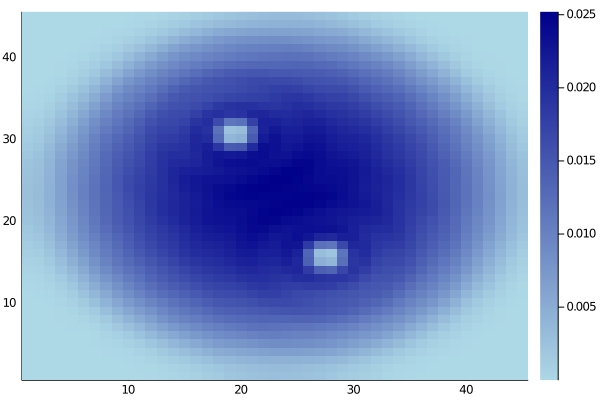

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)